## GRADIENTS
- We use gradients for detecting edges in images, which allows us to find contours and outlines 
    of objects in images.
- We use them as inputs for quantifying images through feature extraction.
- Histrogram of Oriented Gradients and SIFT are built upon gradient.
- Gradient images used to construct saliency, which highlight the subjects of animage
- Objectives:
    - Gradient magnitude: Measure of how strong the change in image intensity
      is.
    - Gradient orientation: In which direction the change in intensity is
      pointing
    - cv2.Sobel.

## EDGE DETECTION
- Process of finding edges in an image which reveals strucural information
  regarding objects in an image.

## Sobel and Scharr Kernels
$G_{x} = \begin{bmatrix}-1 & 0 & +1 \\  -2 & 0 & +2 \\  -1 & 0 & +1\end{bmatrix}$

$G_{y} = \begin{bmatrix}-1 & -2 & -1 \\  0 & 0 & 0 \\  +1 & +2 & +1\end{bmatrix}$

## GRADIENT MAGNITUDE AND ORIENTATION

- Gradient Magnitude:
    $G = \sqrt{G_{x}^{2} + G_{y}^{2}}$
- Gradient Orientation
    $\theta = arctan2(G_{y}, G_{x}) \times (\frac{180}{\pi})$

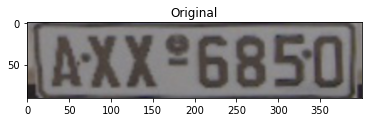

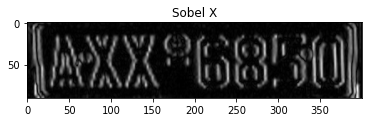

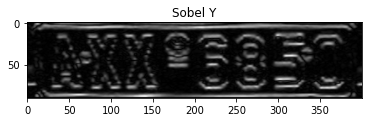

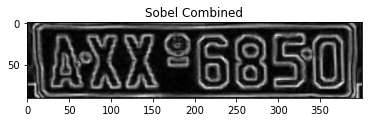

-1

In [1]:
import argparse 
import cv2
import numpy as np
import sys
sys.path.append("../../")
from cv_imshow import display_image

# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True, help="Path to the image")
#ap.add_argument("-l","--min-angle", type=float, default=175.0)
#ap.add_argument("-u", "--max-angle", type=float, default=180.0)
#args = vars(ap.parse_args())

args = {
    "image":"../../images/license_plate.png",
    "min_angle":175,
    "max_angle":180
}
    
    
# load the image, convert it to grayscale, and display the original
# image
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image("Original", image)
    
gx = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gy = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

gx = cv2.convertScaleAbs(gx)
gy = cv2.convertScaleAbs(gy)

sobelCombined = cv2.addWeighted(gx, 0.5, gy, 0.5, 0)

display_image("Sobel X", gx)
display_image("Sobel Y", gy)
display_image("Sobel Combined", sobelCombined)
cv2.waitKey(0)

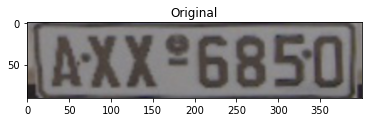

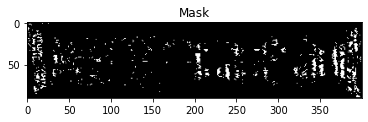

In [2]:
gx = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gy = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

mag = np.sqrt((gx**2)+(gy**2))
orientation = np.arctan2(gy,gx)*(180/np.pi)%180

idxs = np.where(orientation>=args["min_angle"], orientation, -1)
idxs = np.where(orientation<=args["max_angle"], idxs, -1)
mask = np.zeros(gray.shape, dtype='uint8')
mask[idxs>-1] = 255

display_image("Original", image)
display_image("Mask", mask)